# Deep Neural Networks - TensorFlow - Penguin Classification

_ENG_
<br>
**Challenge**: Train a DNN-based classification model with TensorFlow to analyze the characteristics of different penguins and classify them based on their species.

_ESP_
<br>
**Desafío**: Entrenar un modelo de clasificación basado en DNN con TensorFlow para analizar las características de distintos pingüinos y clasificarlos en función de su especie.

---


In [ ]:
import pandas as pd

penguins = pd.read_csv('data/penguins.csv').dropna()
penguins.head()

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
4,36.7,19.3,193.0,3450.0,0
5,39.3,20.6,190.0,3650.0,0


### Normalización de las features FlipperLength y BodyMass

In [ ]:
penguins['FlipperLength'] = penguins['FlipperLength']/10
penguins['BodyMass'] = penguins['BodyMass']/100

penguins.sample(5)

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
274,45.2,14.8,21.2,52.00,1
251,51.1,16.5,22.5,52.50,1
279,45.4,18.7,18.8,35.25,2
89,38.9,18.8,19.0,36.00,0
336,51.9,19.5,20.6,39.50,2


### Oversampling para incrementar el tamaño del dataset

In [ ]:
for i in range(1,3):
  penguins = penguins.append(penguins)

sample = penguins.sample(10)
sample

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
82,36.7,18.8,18.7,38.00,0
148,36.0,17.8,19.5,34.50,0
297,48.5,17.5,19.1,34.00,2
222,47.7,15.0,21.6,47.50,1
192,42.7,13.7,20.8,39.50,1
78,36.2,16.1,18.7,35.50,0
243,52.2,17.1,22.8,54.00,1
147,36.6,18.4,18.4,34.75,0
257,46.8,16.1,21.5,55.00,1
127,41.5,18.3,19.5,43.00,0


### Conversor para visualizar el nombre de las especies segun su código en el dataset

In [ ]:
penguin_classes = ['Adelie', 'Gentoo', 'Chinstrap']
print(sample.columns[0:5].values, 'SpeciesName')
for index, row in penguins.sample(10).iterrows():
    print('[',row[0], row[1], row[2],row[3], int(row[4]), ']',penguin_classes[int(row[-1])])

['CulmenLength' 'CulmenDepth' 'FlipperLength' 'BodyMass' 'Species'] SpeciesName
[ 50.2 14.3 21.8 57.0 1 ] Gentoo
[ 45.1 14.4 21.0 44.0 1 ] Gentoo
[ 51.5 16.3 23.0 55.0 1 ] Gentoo
[ 46.7 15.3 21.9 52.0 1 ] Gentoo
[ 50.0 15.3 22.0 55.5 1 ] Gentoo
[ 37.6 19.1 19.4 37.5 0 ] Adelie
[ 49.8 17.3 19.8 36.75 2 ] Chinstrap
[ 36.9 18.6 18.9 35.0 0 ] Adelie
[ 52.1 17.0 23.0 55.5 1 ] Gentoo
[ 49.0 19.5 21.0 39.5 2 ] Chinstrap


### Dividir el dataset en 70% training y 30% test

In [ ]:
from sklearn.model_selection import train_test_split

features = ['CulmenLength','CulmenDepth','FlipperLength','BodyMass']
label = 'Species'

x_train, x_test, y_train, y_test = train_test_split(penguins[features].values,
                                                    penguins[label].values,
                                                    test_size=0.30,
                                                    random_state=0)

print('Training Set: %d, Test Set: %d \n' % (len(x_train), len(x_test)))
print("Sample of features and labels:")

for n in range(0,24):
    print(x_train[n], y_train[n], '(' + penguin_classes[y_train[n]] + ')')

Training Set: 957, Test Set: 411 

Sample of features and labels:
[51.1 16.5 22.5 52.5] 1 (Gentoo)
[50.7 19.7 20.3 40.5] 2 (Chinstrap)
[49.5 16.2 22.9 58. ] 1 (Gentoo)
[39.3 20.6 19.  36.5] 0 (Adelie)
[42.5 20.7 19.7 45. ] 0 (Adelie)
[50.  15.3 22.  55.5] 1 (Gentoo)
[50.2  18.7  19.8  37.75] 2 (Chinstrap)
[50.7 19.7 20.3 40.5] 2 (Chinstrap)
[49.1  14.5  21.2  46.25] 1 (Gentoo)
[43.2 16.6 18.7 29. ] 2 (Chinstrap)
[38.8  17.6  19.1  32.75] 0 (Adelie)
[37.8 17.1 18.6 33. ] 0 (Adelie)
[45.8 14.2 21.9 47. ] 1 (Gentoo)
[43.8 13.9 20.8 43. ] 1 (Gentoo)
[36.  17.1 18.7 37. ] 0 (Adelie)
[43.3 13.4 20.9 44. ] 1 (Gentoo)
[36.  18.5 18.6 31. ] 0 (Adelie)
[41.1  19.   18.2  34.25] 0 (Adelie)
[33.1 16.1 17.8 29. ] 0 (Adelie)
[40.9 13.7 21.4 46.5] 1 (Gentoo)
[45.2 17.8 19.8 39.5] 2 (Chinstrap)
[48.4 14.6 21.3 58.5] 1 (Gentoo)
[43.6 13.9 21.7 49. ] 1 (Gentoo)
[38.5  17.9  19.   33.25] 0 (Adelie)


### Instalar e importar las librerias de TensorFlow

In [ ]:
!pip install --upgrade tensorflow

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
from tensorflow.keras import optimizers

tensorflow.random.set_seed(0)

print("Libraries imported.")
print('Keras version:',keras.__version__)
print('TensorFlow version:',tensorflow.__version__)

Libraries imported.
Keras version: 2.11.0
TensorFlow version: 2.11.0


### Preparar dataset para TensorFlow

In [ ]:

# Establecer data type 'float32' en feauters
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Establecer data type para labels de categorias
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)
print('Dataset ready...')

Dataset ready...


### Crear y entrenar la red neuronal

In [ ]:
## Definir una red de clasificasión
### Numero de nodos de capa ocultos
hl = 10

model = Sequential()
model.add(Dense(hl, input_dim=len(features), activation='relu'))
model.add(Dense(hl, input_dim=hl, activation='relu'))
model.add(Dense(len(penguin_classes), input_dim=hl, activation='softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Hyper-parametros para el optimizador
lr_value = 0.001
opt = optimizers.Adam(learning_rate=lr_value)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

# Entrenar el modelo 50 epochs usando lotes de 10 observasiones y usando el
# dataset de test para validación.
num_epochs = 50
history = model.fit(x_train,
                    y_train,
                    epochs=num_epochs,
                    batch_size=10,
                    validation_data=(x_test, y_test))

Epoch 1/50
96/96 [==============================] - 6s 6ms/step - loss: 4.2471 - accuracy: 0.4838 - val_loss: 0.4094 - val_accuracy: 0.9513
Epoch 2/50
96/96 [==============================] - 0s 5ms/step - loss: 0.3013 - accuracy: 0.9582 - val_loss: 0.2220 - val_accuracy: 0.9708
Epoch 3/50
96/96 [==============================] - 0s 4ms/step - loss: 0.1888 - accuracy: 0.9718 - val_loss: 0.1489 - val_accuracy: 0.9708
Epoch 4/50
96/96 [==============================] - 0s 5ms/step - loss: 0.1374 - accuracy: 0.9676 - val_loss: 0.1117 - val_accuracy: 0.9732
Epoch 5/50
96/96 [==============================] - 0s 5ms/step - loss: 0.1067 - accuracy: 0.9739 - val_loss: 0.1355 - val_accuracy: 0.9684
Epoch 6/50
96/96 [==============================] - 0s 4ms/step - loss: 0.0876 - accuracy: 0.9801 - val_loss: 0.0825 - val_accuracy: 0.9805
Epoch 7/50
96/96 [==============================] - 0s 4ms/step - loss: 0.0733 - accuracy: 0.9864 - val_loss: 0.0687 - val_accuracy: 0.9903
Epoch 8/50
96/96 [==

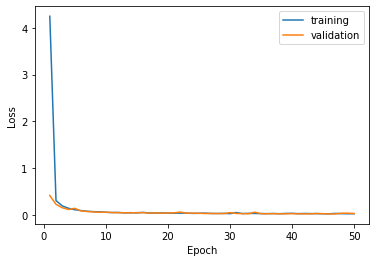

In [ ]:
# Graficar las metricas 'loss' y 'val_loss'
%matplotlib inline
from matplotlib import pyplot as plt

epoch_nums = range(1,num_epochs+1)
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]

plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [ ]:
# Ver los pesos (weights) y sesgos (biases) aprendidos
for layer in model.layers:
    weights = layer.get_weights()[0]
    biases = layer.get_weights()[1]
    print('------------\nWeights:\n',weights,'\nBiases:\n', biases)

------------
Weights:
 [[-0.40756017 -0.33749914 -0.15140367 -0.0782199   0.56505835  0.7010637
   0.06103975 -0.58620274  0.5789609   0.04754043]
 [ 0.03189412 -0.5407158  -0.30287102  0.27338547 -0.29158118  0.07958414
   0.14106673  0.6663705  -0.05765342  0.5970806 ]
 [ 0.35398677  0.19350423  0.59569013  0.70063347  0.54767966 -0.54683536
   0.6390655  -0.07931391  0.2861259  -0.29192206]
 [ 0.46794292  0.6475793  -0.6250504  -0.248626    0.38586783 -0.41620615
  -0.59757024  0.48158     0.21765228 -0.6430977 ]] 
Biases:
 [-0.00672153 -0.01678248  0.          0.19585784 -0.08281565 -0.05104898
  0.          0.2907666   0.0429667   0.        ]
------------
Weights:
 [[ 1.5223575e-01 -1.0591174e-01  2.8380525e-01 -7.1420759e-02
  -4.4875509e-01  4.8120272e-01 -4.2607066e-01 -5.1192987e-01
  -1.3401058e-01 -2.6972616e-01]
 [-5.1056528e-01 -3.2549921e-01 -5.9284151e-01  7.7153462e-01
   3.0713463e-01 -4.4430649e-01  2.9421371e-01  3.3872733e-01
   4.1924357e-02 -3.6706248e-01]
 [ 1.09

13/13 [==============================] - 0s 2ms/step


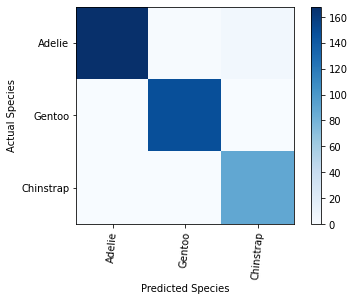

In [ ]:
# Evaluar la performance del modelo con una matriz de confusión
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

class_probabilities = model.predict(x_test)
predictions = np.argmax(class_probabilities, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Graficar la matriz de confusión
cm = confusion_matrix(true_labels, predictions)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(penguin_classes))
plt.xticks(tick_marks, penguin_classes, rotation=85)
plt.yticks(tick_marks, penguin_classes)
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

### Exportar Modelo y Probarlo

In [ ]:
# Guardar el modelo entrenado
modelFileName = 'models/penguin-classifier.h5'
model.save(modelFileName)
del model  # borrar las variables del modelo existente
print('model saved as', modelFileName)

model saved as models/penguin-classifier.h5


In [ ]:
# Importar el modelo guardado
model = models.load_model(modelFileName)

# Crear un nuevo array de features
# (caracteristicas de un nuevo pinguino observado)
x_new = np.array([[50.4,15.3,20,50]])
print ('New sample: {}'.format(x_new))

# Usar el modelo para predecir el tipo de pinguino
class_probabilities = model.predict(x_new)
predictions = np.argmax(class_probabilities, axis=1)

print(penguin_classes[predictions[0]])

New sample: [[50.4 15.3 20.  50. ]]
1/1 [==============================] - 0s 46ms/step
Gentoo
